<a href="https://colab.research.google.com/github/thomas-c-reid/TensorflowDeepLearning/blob/master/11_ARIMA_time_series_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install statsmodels
# !pip uninstall pmdarima -y
# !pip install pmdarima
# !pip install pmdarima.arima
# !pip install pyramid-arima

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pmdarima 

In [33]:
plt.style.use("dark_background")

Month         object
Passengers     int64
dtype: object
Month         datetime64[ns]
Passengers             int64
dtype: object


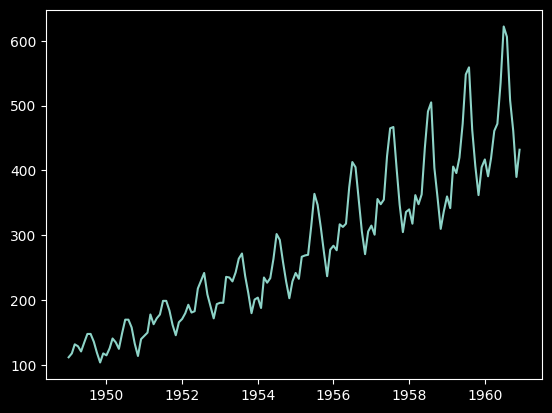

In [34]:
df = pd.read_csv("AirPassengers.csv")
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
print(df.dtypes)

df["Month"] = pd.to_datetime(df["Month"])

print(df.dtypes)

df.set_index("Month", inplace=True)

plt.plot(df["Passengers"])

In [36]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df)

(0.01, False)

In [37]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, "if above 0.05, data is stationary")

pvalue =  0.991880243437641 if above 0.05, data is stationary


In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df["Passengers"], model = "additive")
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

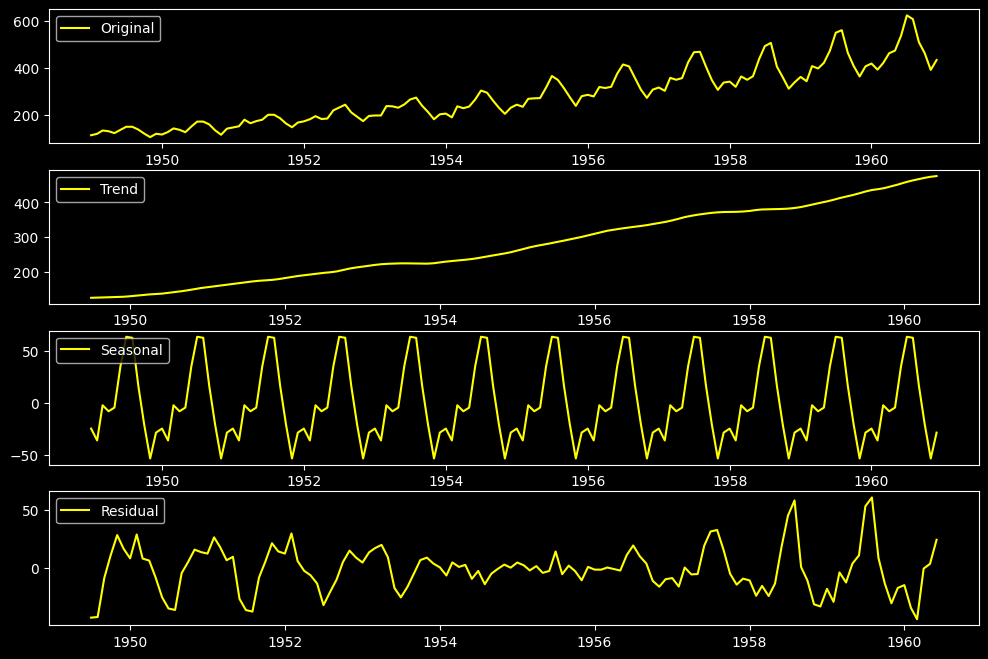

In [41]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

In [42]:
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components

from pmdarima.arima.auto import auto_arima
arima_model = auto_arima(df["Passengers"], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.50 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.52 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.91 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.54 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.51 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=6.42 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.63 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.06 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.84 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [43]:
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 03 Apr 2023   AIC                           1019.178
Time:                                     18:12:22   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

In [44]:
size = int(len(df) *0.66)
X_train, X_test = df[0:size], df[size:len(df)]

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(X_train["Passengers"], order=(0,1,1), seasonal_order = (2,1,1,12))
result = model.fit()
result.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.269
Date:                            Mon, 03 Apr 2023   AIC                            610.537
Time:                                    18:16:34   BIC                            622.571
Sample:                                01-01-1949   HQIC                           615.368
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3201      0.103     -3.103      0.002      -0.522      -0.118
ar.S.L12       0.6847      0.609      1.124      0.261      -0.509       1.878
ar.S.L24       0.3142      0.125      2.520      0.012       0.070       0.559
ma.S.L12      -0.9812      5.431     -0.181      0.857     -11.626       9.664
sigma2        78.6460    379.218      0.207      0.836    -664.607     821.899
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
#Train prediction
start_index = 0
end_index = len(X_train) - 1
train_predictions = result.predict(start_index, end_index)

<Axes: xlabel='Month'>

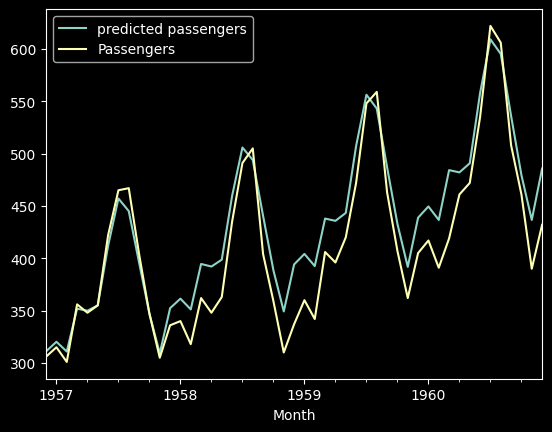

In [50]:
start_index = len(X_train)
end_index = len(df) - 1
prediction = result.predict(start_index, end_index).rename("predicted passengers")

prediction.plot(legend = True)
X_test["Passengers"].plot(legend = True)

In [51]:
import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(X_train, train_predictions))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16.14 RMSE
Test Score: 29.49 RMSE


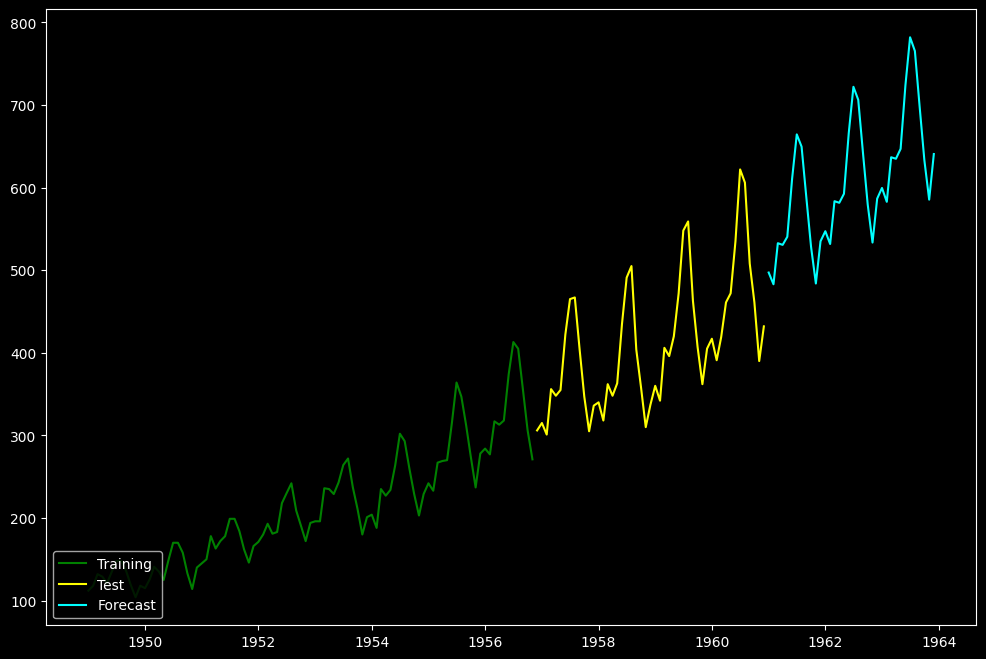

In [54]:
forecast = result.predict(start = len(df), end=(len(df)-1) + 3 *12, typ="levels").rename("forecast")
plt.figure(figsize=(12,8))
plt.plot(X_train, label='Training', color='green')
plt.plot(X_test, label='Test', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.legend(loc='lower left')
plt.show()